<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/classification_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [2]:
%load_ext watermark
%watermark -d -v -m -p requests,numpy,pandas,matplotlib,seaborn,sklearn

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

requests  : 2.23.0
numpy     : 1.19.5
pandas    : 1.1.5
matplotlib: 3.2.2
seaborn   : 0.11.1
sklearn   : 0.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 4.19.112+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Applied-Data-Science-Workshop/master/data/hr-analytics/hr_data_processed.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


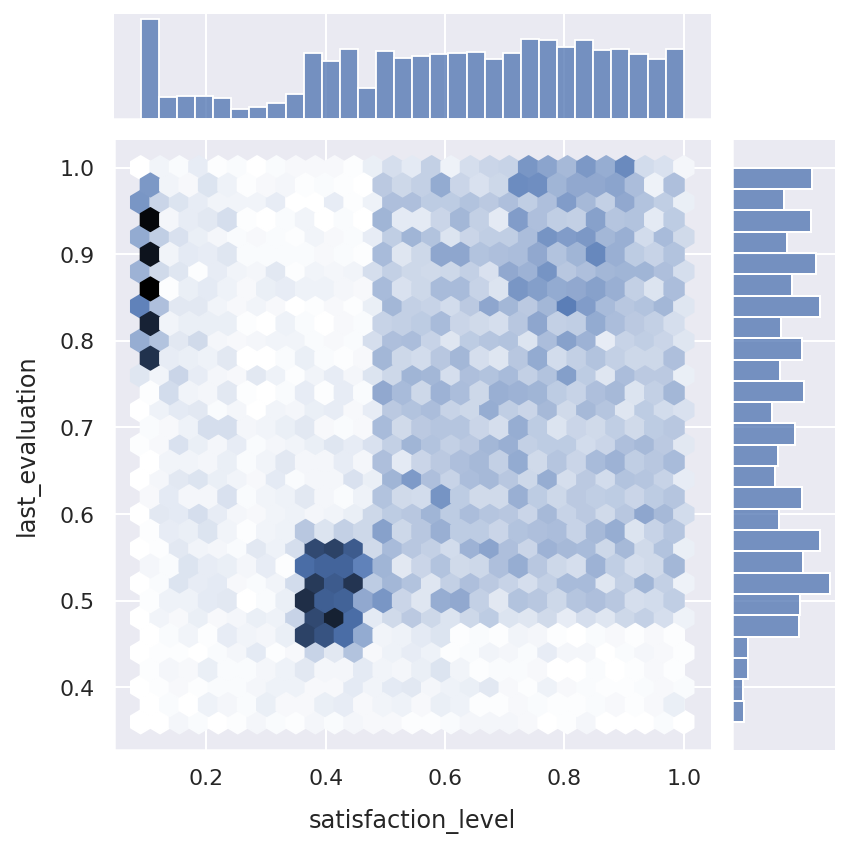

In [9]:
## Draw bivariate/univariate graphs
sns.jointplot(x='satisfaction_level', y='last_evaluation', data=df, kind='hex')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

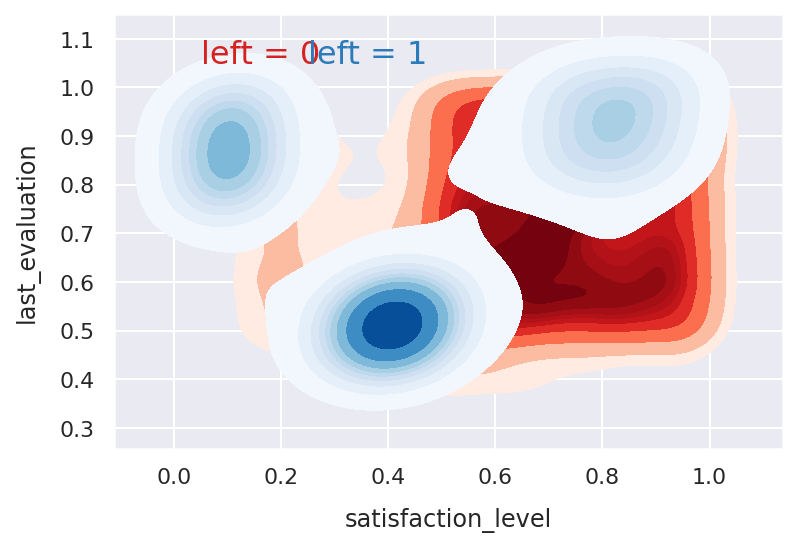

In [10]:

# Segementing by the target variable

fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(
        df.loc[df.left==i, 'satisfaction_level'],
        df.loc[df.left==i, 'last_evaluation'],
        cmap=c,
        **plot_args
    )

ax.text(
    0.05, 1.05, 'left = 0',
    size=16,
    color=sns.color_palette('Reds')[-2]
)
ax.text(
    0.25, 1.05, 'left = 1',
    size=16, color=sns.color_palette('Blues')[-2]
)

plt.show()

In [11]:
# Train test split
from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values,
    df['left'].values,
    test_size=0.3,
    random_state=1
)


# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [12]:
## SVM Classification
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 75.9%


In [14]:
# What does the confusion matrix look like?

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3416,    0],
       [1084,    0]])

In [15]:
# What is the accuracy by class?

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


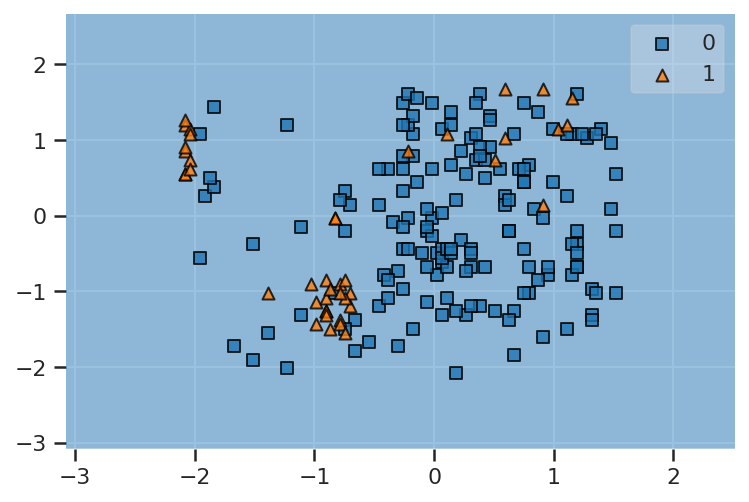

In [16]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions
# Note: If getting ModuleNotFoundError,
# then you can try installing mlxtend with pip.
# Open the terminal and run: "pip install mlxtend"

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm);

In [17]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples(
        [('predictions', 0), ('predictions', 1)]
    )
    indx = pd.MultiIndex.from_tuples(
        [('actual', 0), ('actual', 1)]
    )
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 89.7%


predictions     
                   0    1
actual 0        3308  108
       1         354  730


percent accuracy score per class:
left = 0 : 96.84%
left = 1 : 67.34%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


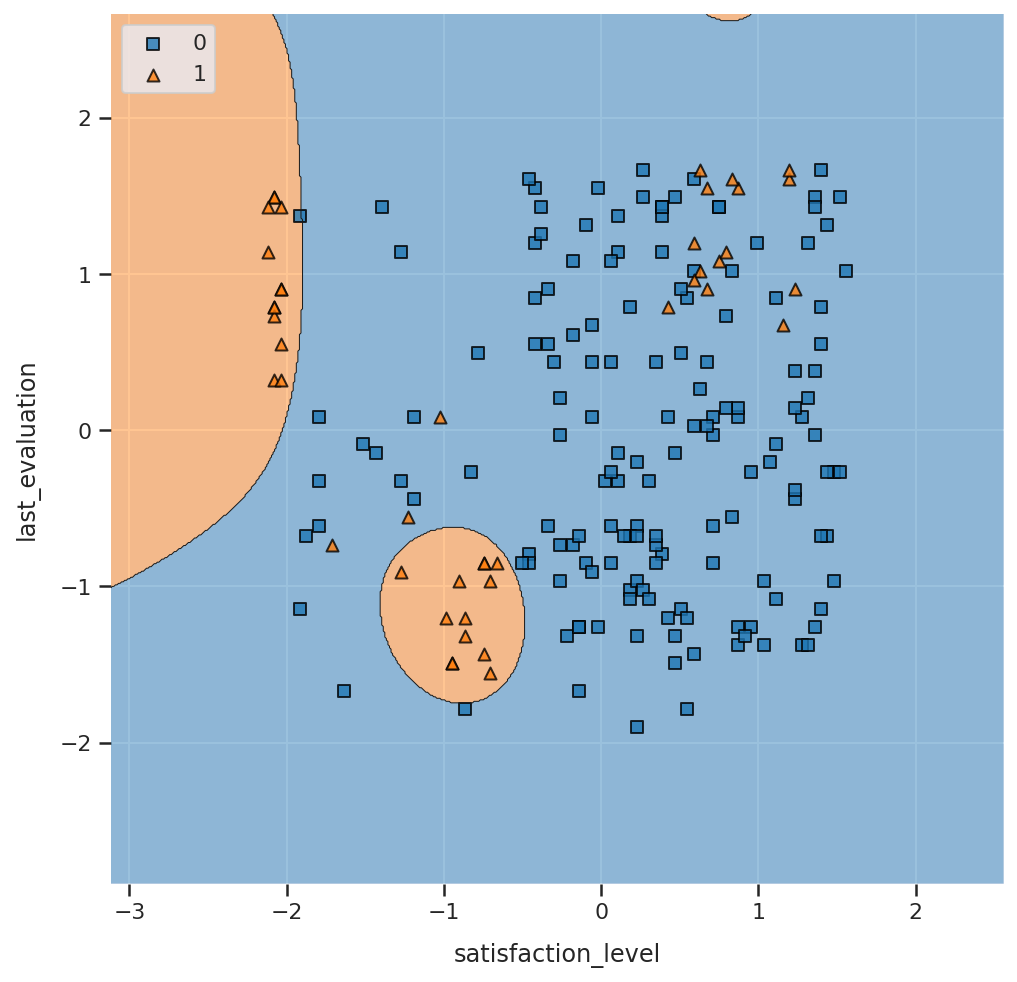

In [19]:
check_model_fit(svm, X_test_std, y_test)
plt.show()

total accuracy = 90.9%


predictions     
                   0    1
actual 0        3203  213
       1         198  886


percent accuracy score per class:
left = 0 : 93.76%
left = 1 : 81.73%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


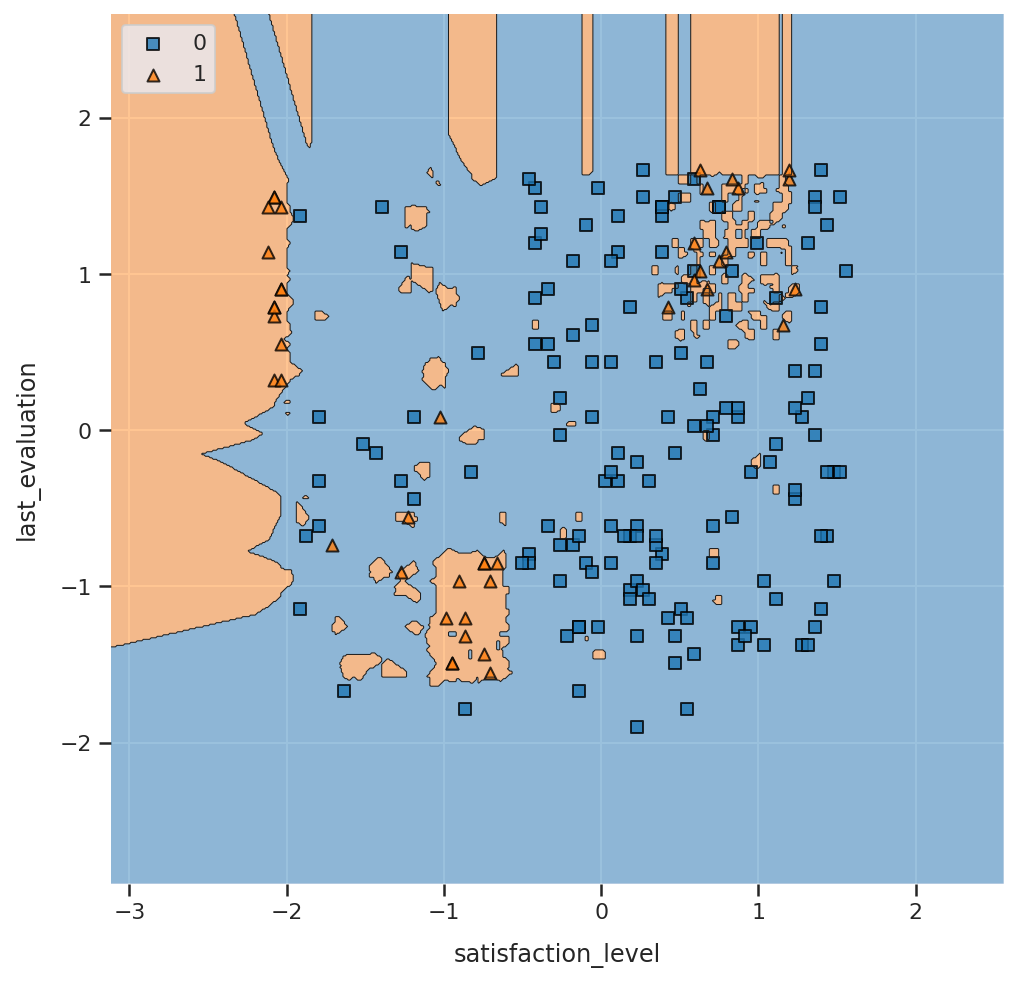

In [20]:
# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.show()

total accuracy = 91.6%


predictions     
                   0    1
actual 0        3290  126
       1         254  830


percent accuracy score per class:
left = 0 : 96.31%
left = 1 : 76.57%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


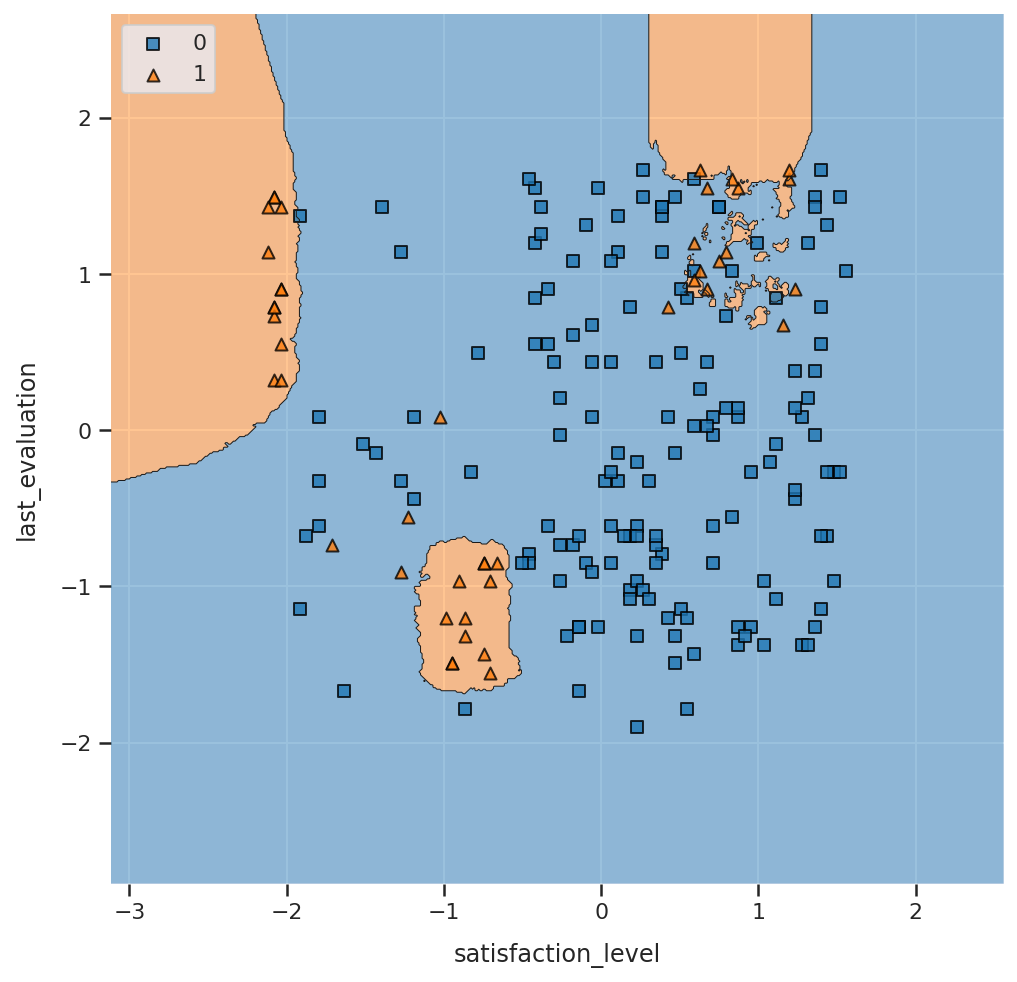

In [27]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.show()

total accuracy = 92.0%


predictions     
                   0    1
actual 0        3371   45
       1         317  767


percent accuracy score per class:
left = 0 : 98.68%
left = 1 : 70.76%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


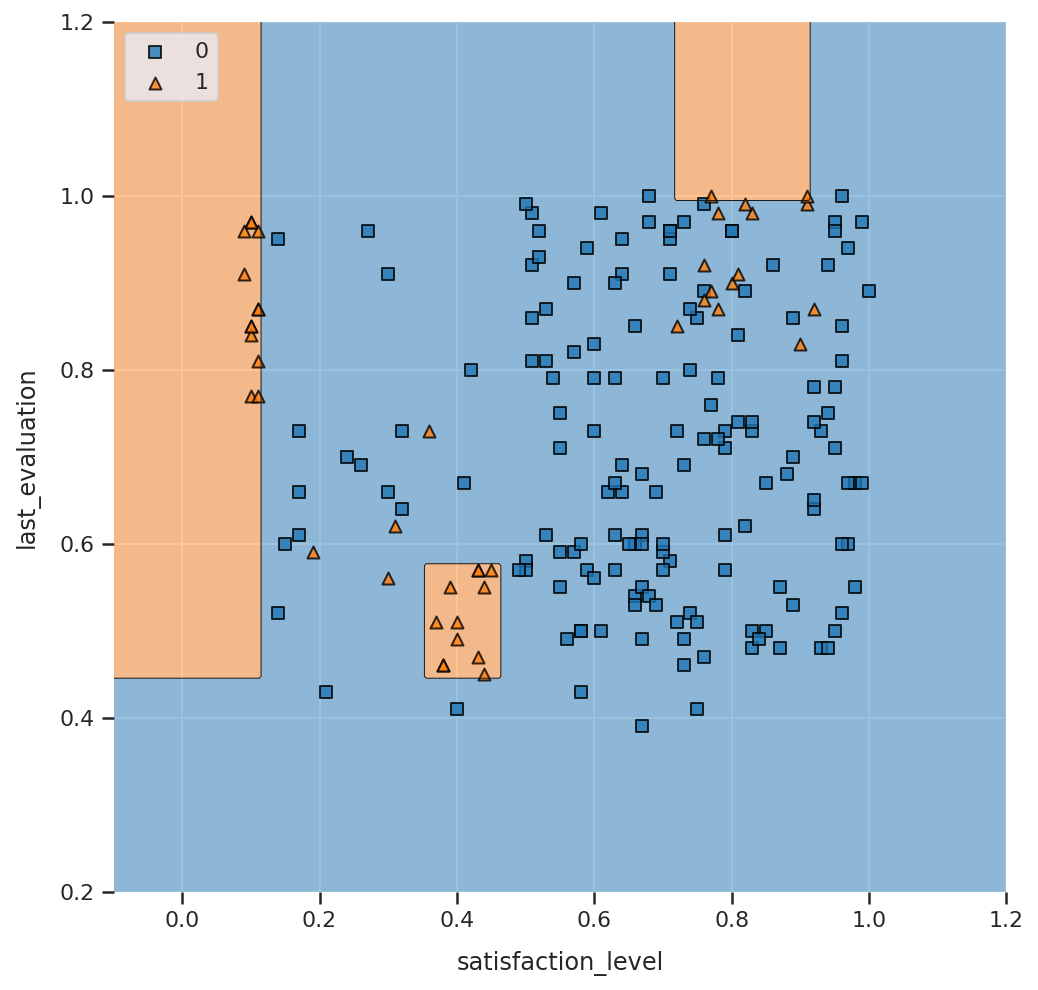

In [22]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest

forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=1,
)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.2)
plt.show()

In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    forest.estimators_[0],
    out_file=None,
    feature_names=features,  
    class_names=['no', 'yes'],  
    filled=True, rounded=True,  
    special_characters=True,
)
graph = graphviz.Source(dot_data)

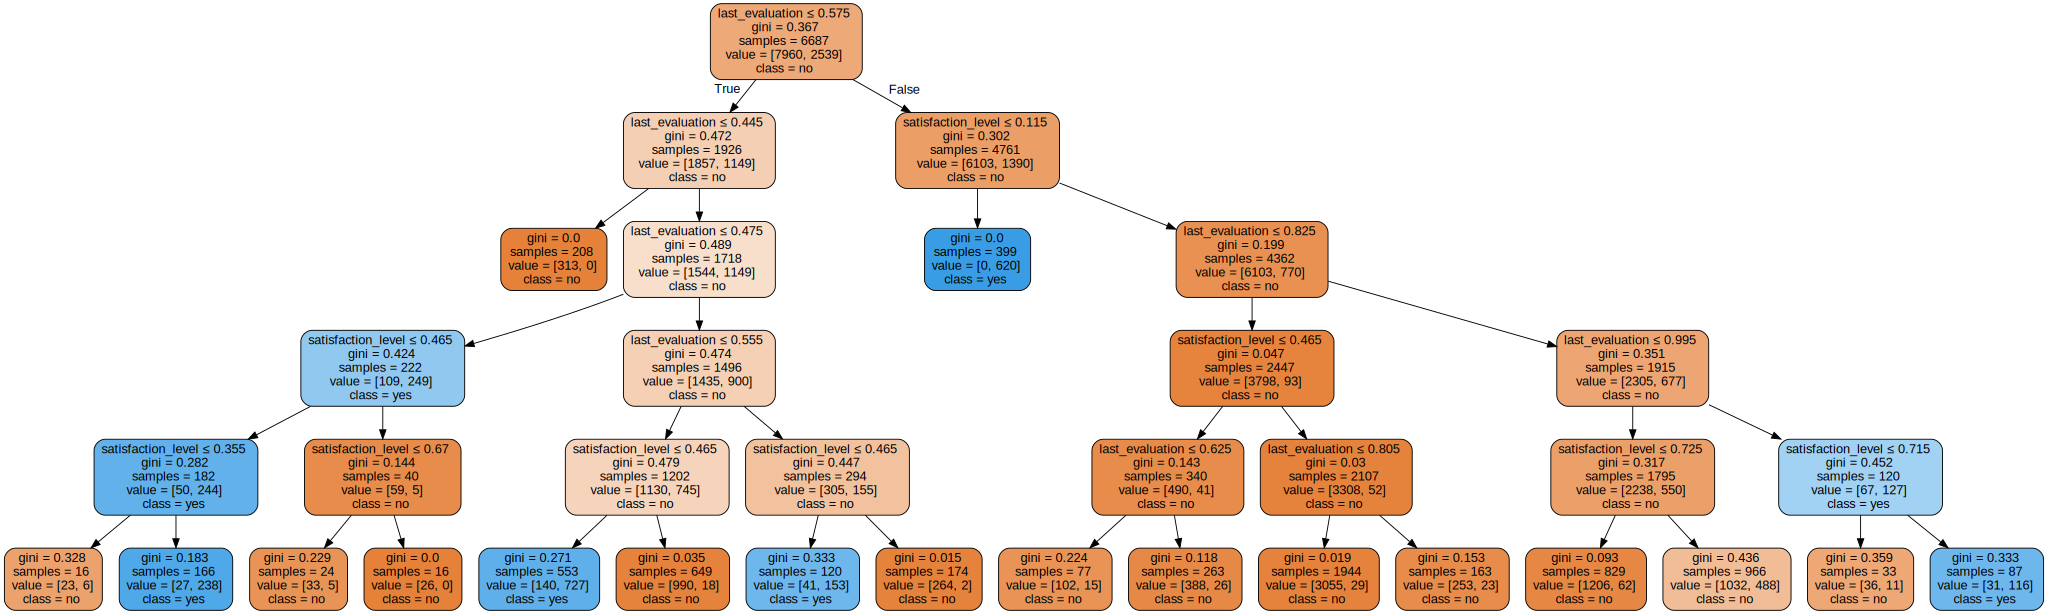

In [24]:
graph

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Applied-Data-Science-Workshop/master/data/hr-analytics/hr_data_processed.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [26]:
df[['number_project', 'average_montly_hours']].describe().T

,count,mean,std,min,25%,50%,75%,max
number_project,14999.0,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,200.992489,49.492423,96.0,156.0,200.0,244.0,310.0


In [28]:
features = ['number_project', 'average_montly_hours']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values,
    df['left'].values,
    test_size=0.3,
    random_state=1
)

In [30]:
# Train a kernel SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1, gamma='scale')
svm.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_scaled)
accuracy_score(y_test, y_pred) * 100

75.91111111111111

In [34]:

# What is the accuracy by class?

from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, y_pred)
cmat.diagonal() / cmat.sum(axis=1) * 100

array([100.,   0.])

total accuracy = 75.9%


predictions   
                   0  1
actual 0        3416  0
       1        1084  0


percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


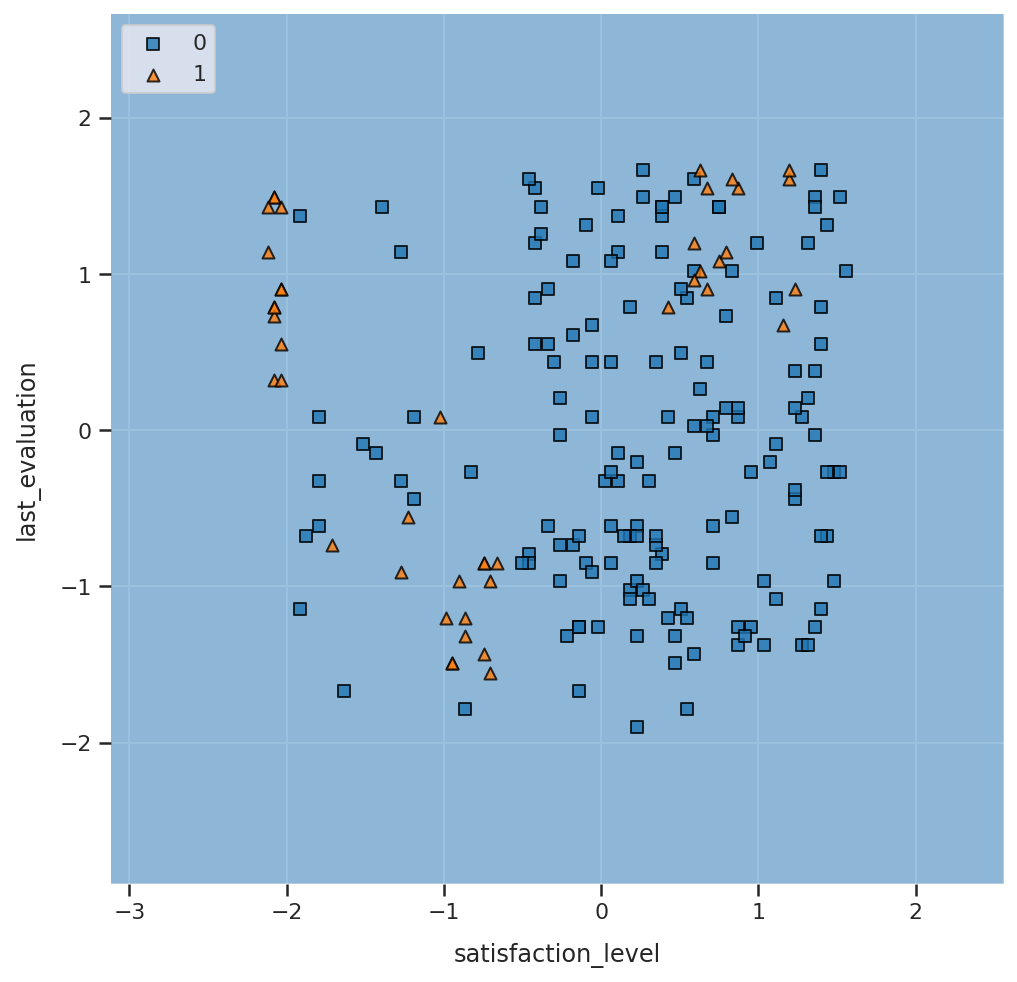

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples(
        [('predictions', 0), ('predictions', 1)]
    )
    indx = pd.MultiIndex.from_tuples(
        [('actual', 0), ('actual', 1)]
    )
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

  
check_model_fit(svm, X_test_std, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


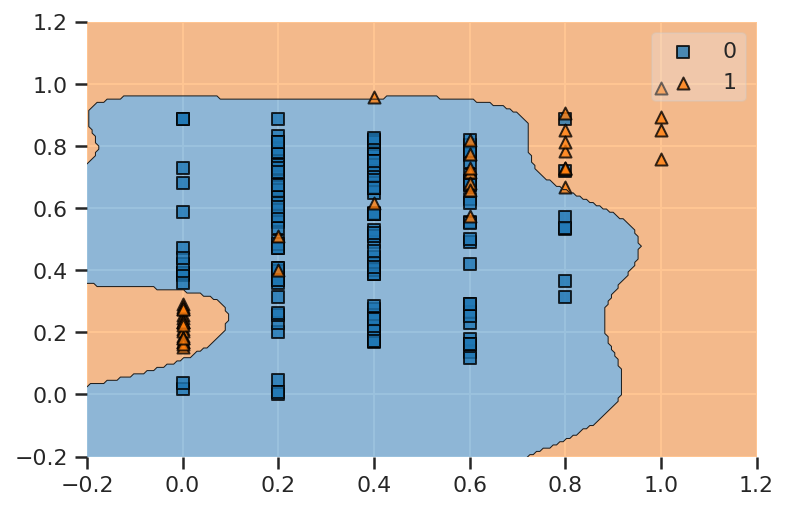

In [37]:
svm = SVC(kernel='rbf', C=50, random_state=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
X, y = X_train_scaled[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


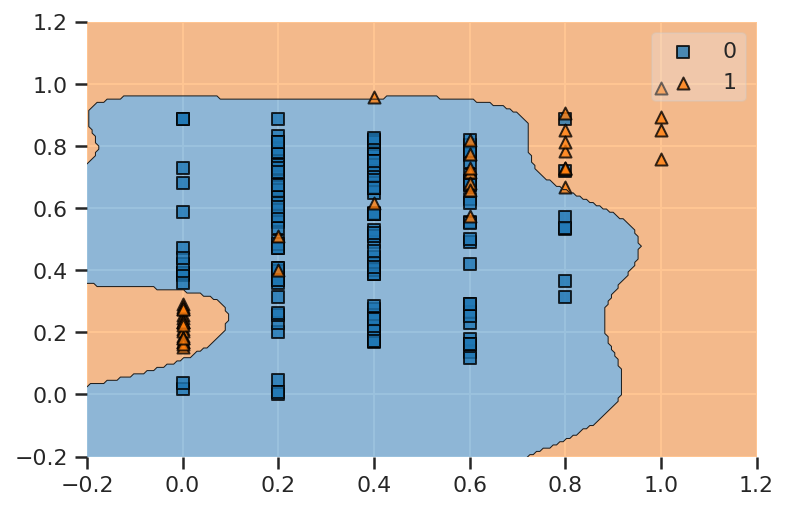

In [36]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions

N_samples = 200
X, y = X_train_scaled[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()